# Digits Classification

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib as mpl

digits = load_digits()

xs = digits.data
ys = digits.target

print(xs.shape)
print(ys.shape)

(1797, 64)
(1797,)


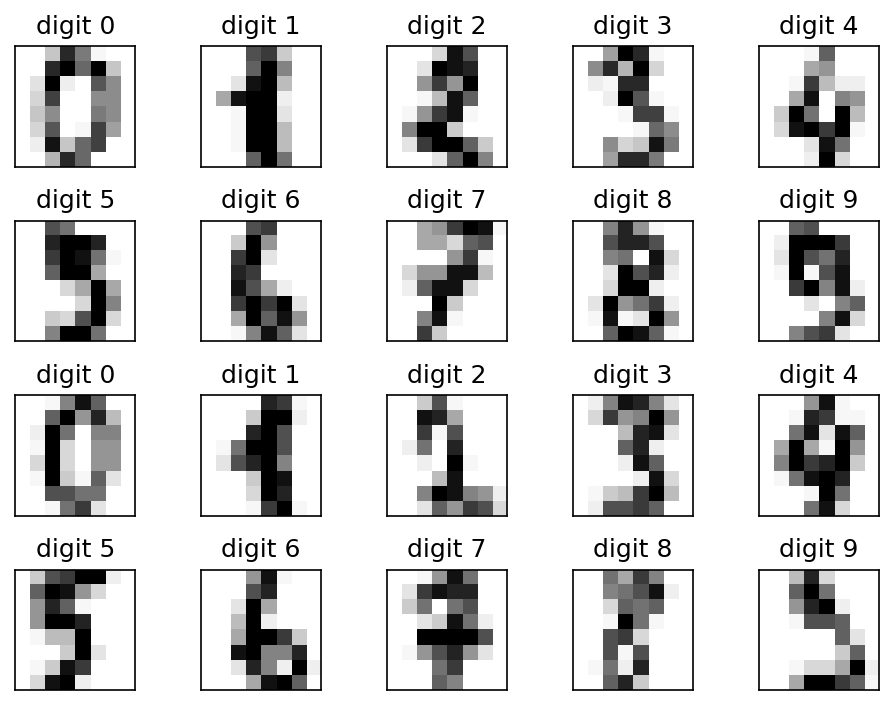

In [2]:
mpl.rcParams["figure.dpi"] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()

for index in range(num_rows * num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap="Greys", interpolation="nearest")
    ax[index].set_title("digit " + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np


def get_accuracy(ys, ys_pred):
    assert ys.shape == ys_pred.shape
    assert ys.ndim == 1
    return np.sum(ys == ys_pred) / len(ys)


xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs, ys, test_size=0.1, stratify=ys
)

## Classifier #1 KNN



In [4]:
# Your code here.
from sklearn.neighbors import KNeighborsClassifier

# Try different values of k
k_values = range(1, 21)
accuracy_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xs_train, ys_train)

    ys_pred = knn.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracy_values.append(accuracy)
    print(f"k = {k}, Accuracy: {accuracy}")

k = accuracy_values.index(max(accuracy_values)) + 1
print(k)

k = 1, Accuracy: 0.9944444444444445
k = 2, Accuracy: 0.9777777777777777
k = 3, Accuracy: 0.9888888888888889
k = 4, Accuracy: 0.9722222222222222
k = 5, Accuracy: 0.9777777777777777
k = 6, Accuracy: 0.9777777777777777
k = 7, Accuracy: 0.9833333333333333
k = 8, Accuracy: 0.9777777777777777
k = 9, Accuracy: 0.9777777777777777
k = 10, Accuracy: 0.9777777777777777
k = 11, Accuracy: 0.9777777777777777
k = 12, Accuracy: 0.9777777777777777
k = 13, Accuracy: 0.9777777777777777
k = 14, Accuracy: 0.9722222222222222
k = 15, Accuracy: 0.9833333333333333
k = 16, Accuracy: 0.9777777777777777
k = 17, Accuracy: 0.9833333333333333
k = 18, Accuracy: 0.9777777777777777
k = 19, Accuracy: 0.9833333333333333
k = 20, Accuracy: 0.9833333333333333
1


number of neighbours to be scanned is set to 1 as it gives the best accuracy score

## Classifier #2 Decision Tree



In [5]:
# Your code here.
from sklearn.tree import DecisionTreeClassifier
depth_values = range(1, 21)
accuracy_values = []
for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(xs_train, ys_train)

    ys_pred = dt.predict(xs_test)
    accuracy = get_accuracy(ys_test, ys_pred)
    accuracy_values.append(accuracy)
    print(f"Depth = {depth}, Accuracy: {accuracy}")

depth = accuracy_values.index(max(accuracy_values)) + 1
depth #depth of the tree is chosen to be 17

Depth = 1, Accuracy: 0.2
Depth = 2, Accuracy: 0.3111111111111111
Depth = 3, Accuracy: 0.4777777777777778
Depth = 4, Accuracy: 0.5666666666666667
Depth = 5, Accuracy: 0.6777777777777778
Depth = 6, Accuracy: 0.7777777777777778
Depth = 7, Accuracy: 0.8611111111111112
Depth = 8, Accuracy: 0.8666666666666667
Depth = 9, Accuracy: 0.8777777777777778
Depth = 10, Accuracy: 0.85
Depth = 11, Accuracy: 0.8833333333333333
Depth = 12, Accuracy: 0.8555555555555555
Depth = 13, Accuracy: 0.8555555555555555
Depth = 14, Accuracy: 0.8611111111111112
Depth = 15, Accuracy: 0.8666666666666667
Depth = 16, Accuracy: 0.8666666666666667
Depth = 17, Accuracy: 0.8722222222222222
Depth = 18, Accuracy: 0.8444444444444444
Depth = 19, Accuracy: 0.8444444444444444
Depth = 20, Accuracy: 0.8611111111111112


11

depth is set to be 17, as it gives the highest accuracy score

## Compare Linear-SVM and Kernel-SVM


In [6]:
# Your code here.
import time
from sklearn.svm import SVC
linear_svm = SVC(kernel="linear")
kernel_svm = SVC(kernel="rbf")
start_time = time.time()
linear_svm.fit(xs_train, ys_train)
linear_svm_time = time.time() - start_time

y_pred_linear = linear_svm.predict(xs_test)
linear_svm_accuracy = get_accuracy(ys_test, y_pred_linear)

start_time = time.time()
kernel_svm.fit(xs_train, ys_train)
kernel_svm_time = time.time() - start_time

y_pred_linear = kernel_svm.predict(xs_test)
kernel_svm_accuracy = get_accuracy(ys_test, y_pred_linear)

print(f"Linear SVM Training Time: {linear_svm_time:.4f} seconds")
print(f"Linear SVM Test Accuracy: {linear_svm_accuracy:.4f}")

print(f"Kernel SVM (RBF) Training Time: {kernel_svm_time:.4f} seconds")
print(f"Kernel SVM (RBF) Test Accuracy: {kernel_svm_accuracy:.4f}")


Linear SVM Training Time: 0.0219 seconds
Linear SVM Test Accuracy: 0.9611
Kernel SVM (RBF) Training Time: 0.0330 seconds
Kernel SVM (RBF) Test Accuracy: 0.9889


The kernel SVM with RBF provides better accuracy as it can handle non-linear relationships in the data, but at the cost of increased training time. The increased training time is due to more complex computations such as mapping the input features to a higher dimensional space where no linear decision boundary can be found. On the other hand, 

## KNN implementation


In [7]:
# Your code here.
import numpy as np

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, xs, ys):
        self.xs = xs
        self.ys = ys

    def predict(self, xs):
        ys_pred = np.zeros(len(xs), dtype=int)
        for i, x in enumerate(xs):
            distances = np.linalg.norm(self.xs - x, axis=1)
            nearest_indices = np.argsort(distances)[: self.k]
            nearest_labels = self.ys[nearest_indices]
            ys_pred[i] = np.bincount(nearest_labels).argmax()
        return ys_pred

model = KNN(k=1)
model.fit(xs_train, ys_train)
ys_pred = model.predict(xs_test)
accuracy = get_accuracy(ys_test, ys_pred)
print(accuracy)

0.9944444444444445


The performance with the scikit learn KNN classifier and the python class implementation is the same for k=1. 